# **GENE EXPRESSION**

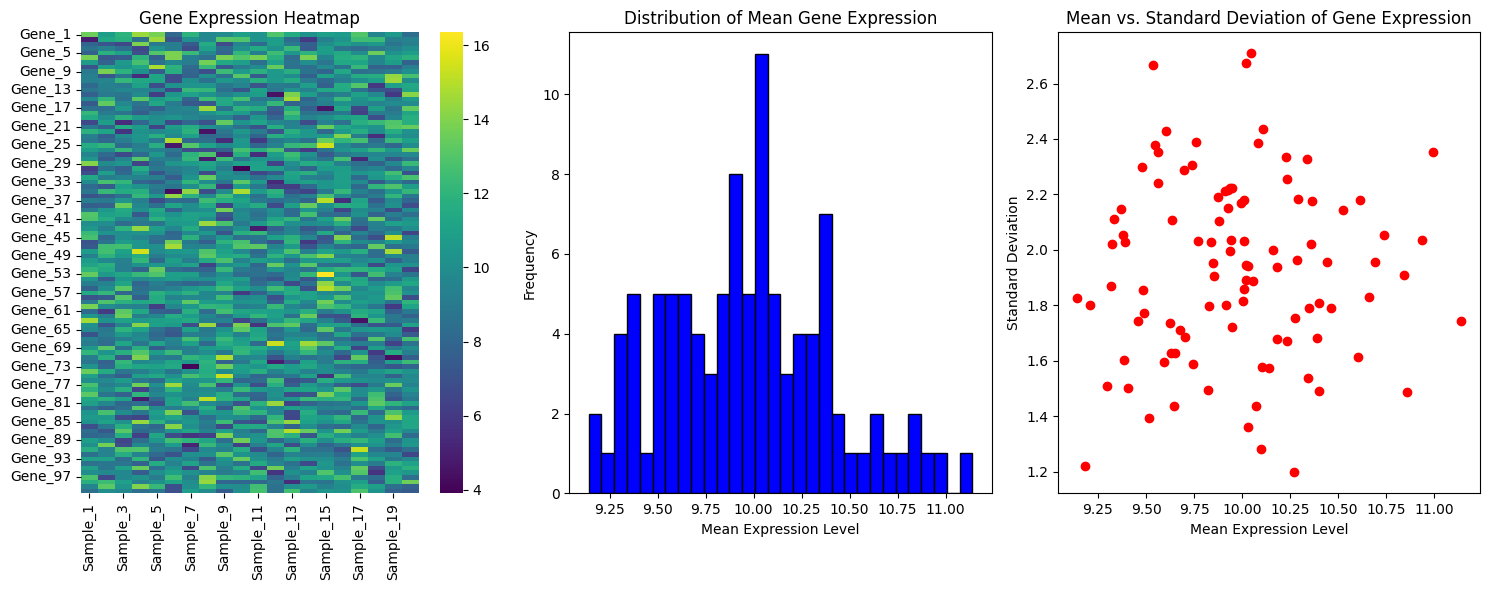

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import Phylo
from io import StringIO
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind 

# Load gene expression data (example data)
# For demonstration, generate synthetic data
np.random.seed(0)
genes = [f'Gene_{i}' for i in range(1, 101)]
samples = [f'Sample_{i}' for i in range(1, 21)]
data = np.random.normal(loc=10, scale=2, size=(100, 20))


df = pd.DataFrame(data, index=genes, columns=samples)


mean_expression = df.mean(axis=1)
std_expression = df.std(axis=1)


plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.heatmap(df, cmap='viridis', cbar=True)
plt.title('Gene Expression Heatmap')

plt.subplot(1, 3, 2)
plt.hist(mean_expression, bins=30, color='blue', edgecolor='black')
plt.xlabel('Mean Expression Level')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Gene Expression')

plt.subplot(1, 3, 3)
plt.scatter(mean_expression, std_expression, color='red')
plt.xlabel('Mean Expression Level')
plt.ylabel('Standard Deviation')
plt.title('Mean vs. Standard Deviation of Gene Expression')

plt.tight_layout()
plt.show()

# **COMPUTATIONAL GENETICS**

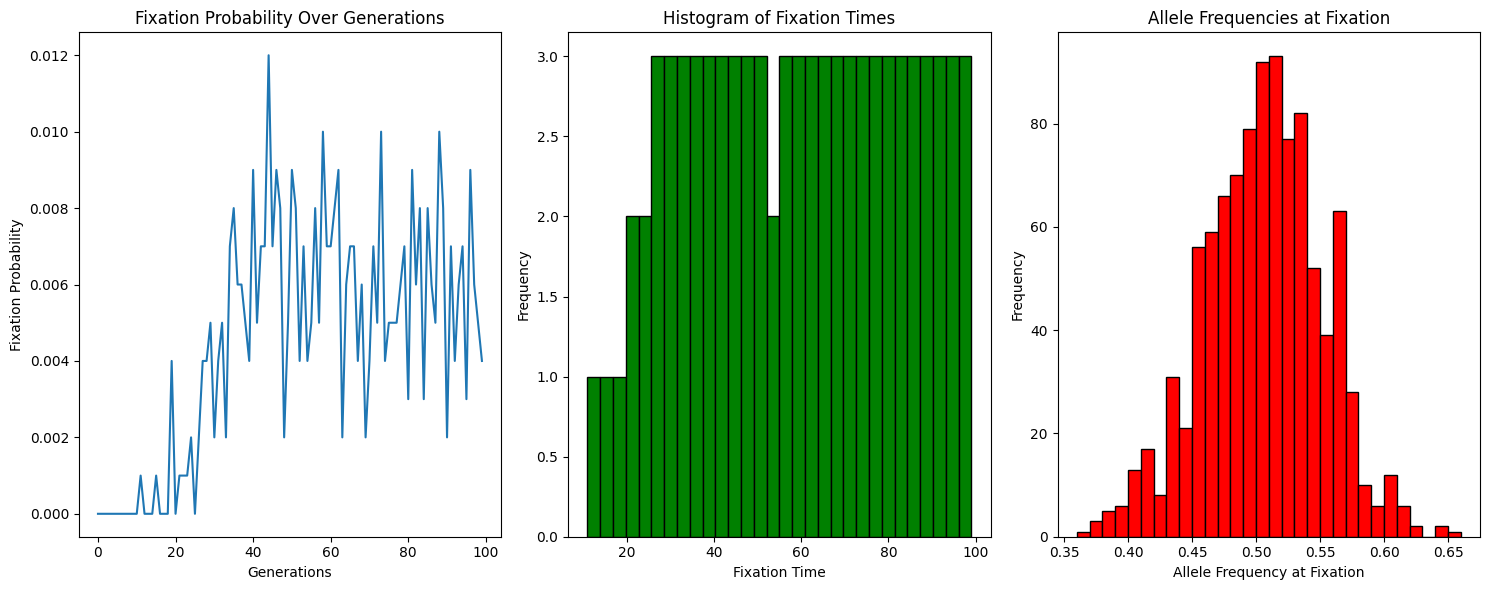

In [2]:
# Simulation of genetic drift
def simulate_genetic_drift(population_size, generations, num_simulations):
    fixation_counts = np.zeros(generations)
    
    for sim in range(num_simulations):
        p = 0.5  # Starting frequency hai allele A ka
        for gen in range(generations):
            num_alleles_A = np.random.binomial(population_size, p)
            p = num_alleles_A / population_size
            if p == 0 or p == 1:
                fixation_counts[gen] += 1
                break
                
    fixation_probability = fixation_counts / num_simulations
    return fixation_probability

# Parameters or data dalna hai yahan par
population_size = 100
generations = 100
num_simulations = 1000

# Simulate genetic drift
fixation_prob = simulate_genetic_drift(population_size, generations, num_simulations)


plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.plot(fixation_prob)
plt.xlabel('Generations')
plt.ylabel('Fixation Probability')
plt.title('Fixation Probability Over Generations')

# Histogram of fixation times
fixation_times = np.nonzero(fixation_prob)[0]
plt.subplot(1, 3, 2)
plt.hist(fixation_times, bins=30, color='green', edgecolor='black')
plt.xlabel('Fixation Time')
plt.ylabel('Frequency')
plt.title('Histogram of Fixation Times')

# Histogram of allele frequencies at fixation
allele_frequencies = np.random.binomial(population_size, 0.5, size=(num_simulations, generations)) / population_size
allele_frequencies_at_fixation = allele_frequencies[:, fixation_times[-1]]
plt.subplot(1, 3, 3)
plt.hist(allele_frequencies_at_fixation, bins=30, color='red', edgecolor='black')
plt.xlabel('Allele Frequency at Fixation')
plt.ylabel('Frequency')
plt.title('Allele Frequencies at Fixation')

plt.tight_layout()
plt.show()

# **Hardy Weinberg Equilibrium**

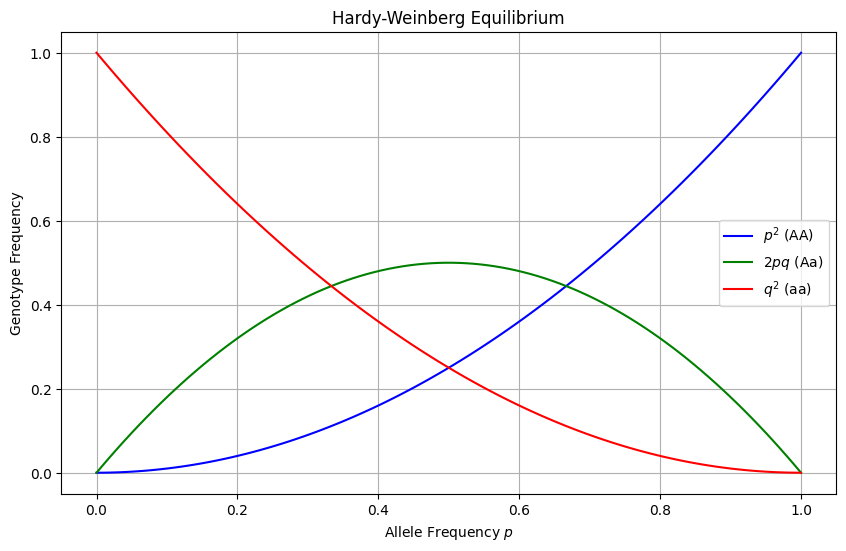

In [3]:
# Hardy-Weinberg Equilibrium formula:
# p^2 + 2pq + q^2 = 1
# where p is the frequency of allele A and q is the frequency of allele a

def compute_hwe(p, q):
    # Ensure that p and q add up to 1
    if p + q != 1:
        raise ValueError("The sum of allele frequencies p and q must be 1.")
    
    # Calculating the genotype frequencies
    p2 = p**2
    pq = 2 * p * q
    q2 = q**2
    
    return p2, pq, q2

# Range of allele frequencies
p_values = np.linspace(0, 1, 100)
q_values = 1 - p_values

# Store genotype frequencies
p2_values = []
pq_values = []
q2_values = []

# Calculate genotype frequencies for each allele frequency
for p, q in zip(p_values, q_values):
    p2, pq, q2 = compute_hwe(p, q)
    p2_values.append(p2)
    pq_values.append(pq)
    q2_values.append(q2)

# Convert lists to arrays
p2_values = np.array(p2_values)
pq_values = np.array(pq_values)
q2_values = np.array(q2_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(p_values, p2_values, label='$p^2$ (AA)', color='blue')
plt.plot(p_values, pq_values, label='$2pq$ (Aa)', color='green')
plt.plot(p_values, q2_values, label='$q^2$ (aa)', color='red')

plt.xlabel('Allele Frequency $p$')
plt.ylabel('Genotype Frequency')
plt.title('Hardy-Weinberg Equilibrium')
plt.legend()
plt.grid(True)
plt.show()


# **Phylogenetic_tree_construction**

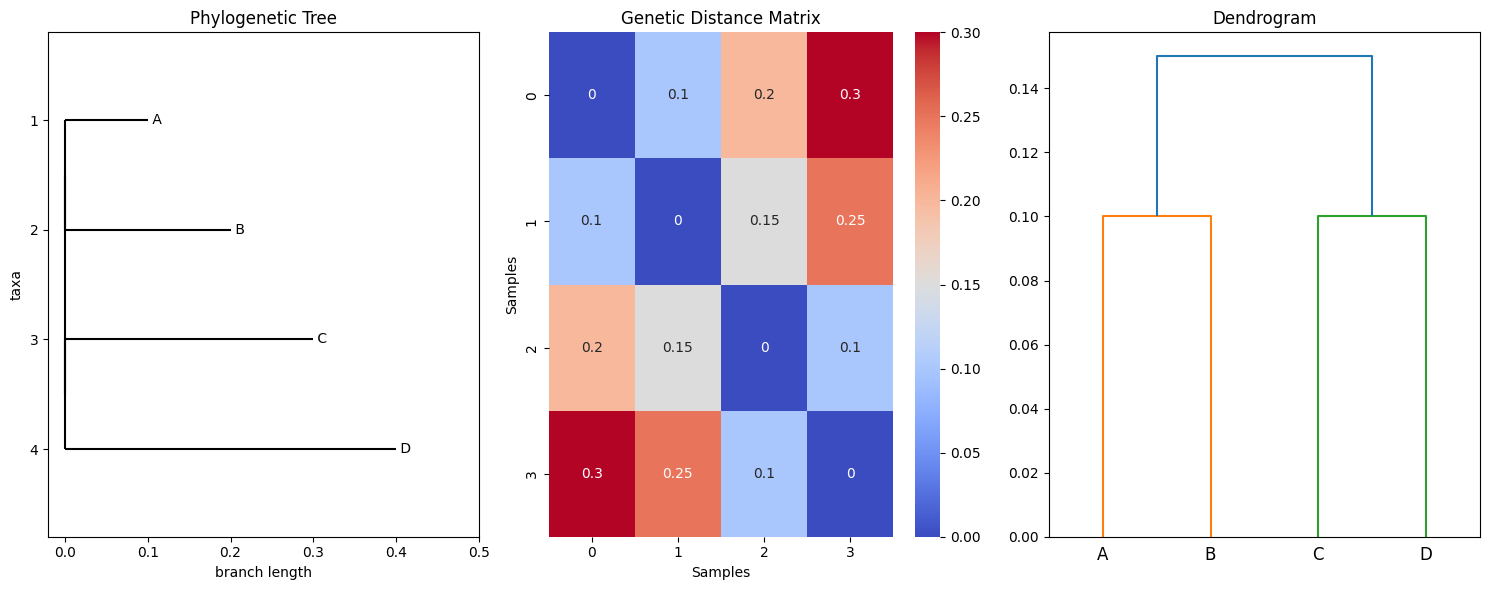

In [4]:

# Example Newick format tree
newick_tree = "((A:0.1,B:0.2),(C:0.3,D:0.4));"
tree = Phylo.read(StringIO(newick_tree), "newick")

# Visualize the tree
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

Phylo.draw(tree, do_show=False, axes=axs[0])
axs[0].set_title('Phylogenetic Tree')

# Simulate and visualize genetic distance matrix
distance_matrix = np.array([[0, 0.1, 0.2, 0.3],
                            [0.1, 0, 0.15, 0.25],
                            [0.2, 0.15, 0, 0.1],
                            [0.3, 0.25, 0.1, 0]])

sns.heatmap(distance_matrix, annot=True, cmap='coolwarm', ax=axs[1])
axs[1].set_title('Genetic Distance Matrix')
axs[1].set_xlabel('Samples')
axs[1].set_ylabel('Samples')

# Convert distance matrix to condensed form
condensed_distance_matrix = squareform(distance_matrix)

# Cluster analysis and dendrogram
linked = linkage(condensed_distance_matrix, 'single')
dendrogram(linked, labels=['A', 'B', 'C', 'D'], ax=axs[2])
axs[2].set_title('Dendrogram')

plt.tight_layout()
plt.show()

# **Population Genetics**

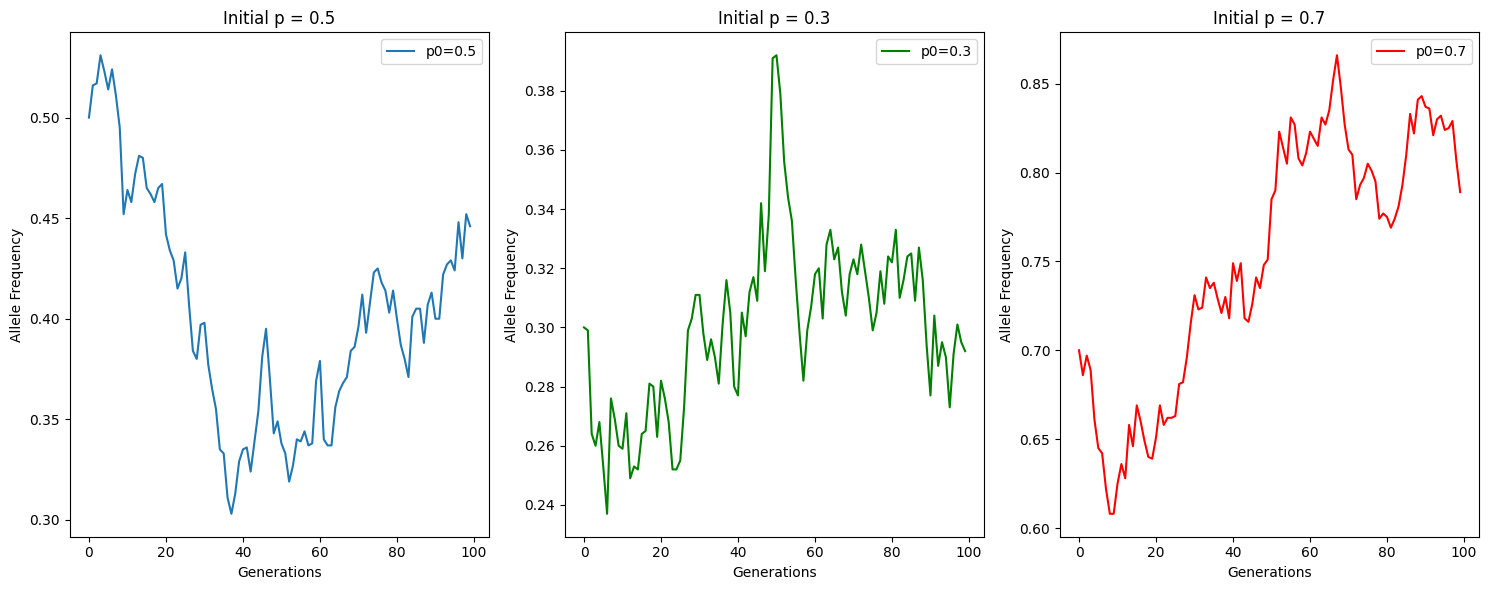

In [5]:

# Simulation of allele frequency change hota hai over generations using Wright-Fisher model
def simulate_wright_fisher(p_init, generations, population_size):
    p_values = np.zeros(generations)
    p_values[0] = p_init
    
    for gen in range(1, generations):
        p = p_values[gen-1]
        num_alleles_A = np.random.binomial(population_size, p)
        p_values[gen] = num_alleles_A / population_size
        
    return p_values

# Parameters
generations = 100
population_size = 1000
p_init = 0.5

# Simulate krna hai for different initial allele frequencies
p_values_0_5 = simulate_wright_fisher(p_init, generations, population_size)
p_values_0_3 = simulate_wright_fisher(0.3, generations, population_size)
p_values_0_7 = simulate_wright_fisher(0.7, generations, population_size)

# Plot results
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.plot(p_values_0_5, label='p0=0.5')
plt.xlabel('Generations')
plt.ylabel('Allele Frequency')
plt.title('Initial p = 0.5')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(p_values_0_3, label='p0=0.3', color='green')
plt.xlabel('Generations')
plt.ylabel('Allele Frequency')
plt.title('Initial p = 0.3')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(p_values_0_7, label='p0=0.7', color='red')
plt.xlabel('Generations')
plt.ylabel('Allele Frequency')
plt.title('Initial p = 0.7')
plt.legend()

plt.tight_layout()
plt.show()

# **Principal_Component_Analysis**

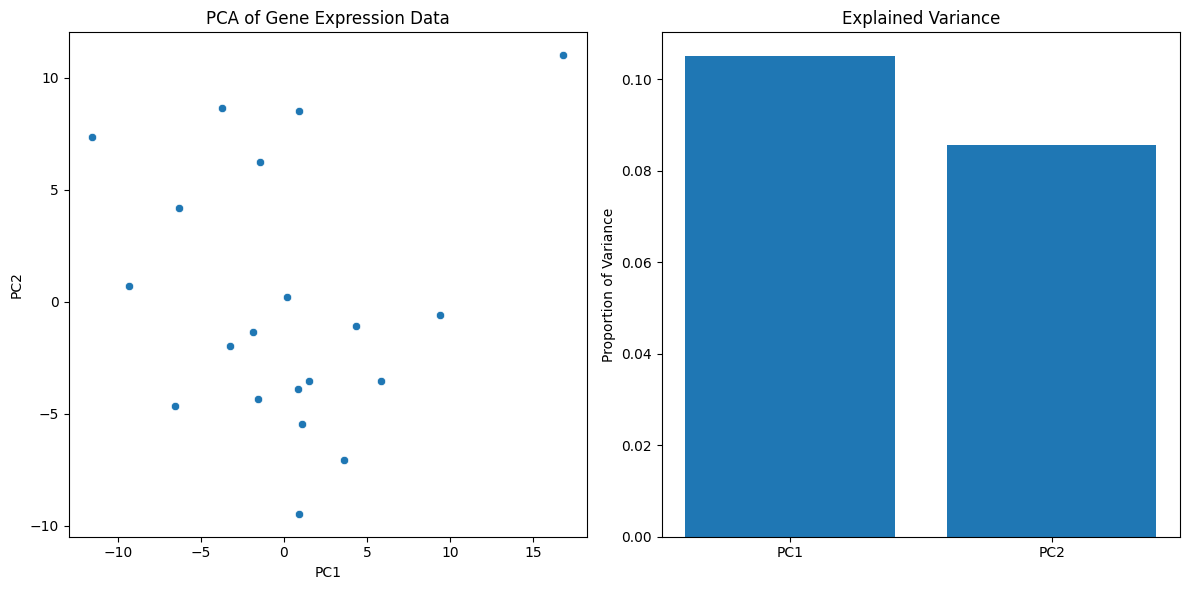

In [6]:

# Generate synthetic gene expression data (base data is needed for expression)
np.random.seed(42)
genes = [f'Gene_{i}' for i in range(1, 101)]
samples = [f'Sample_{i}' for i in range(1, 21)]
data = np.random.normal(loc=10, scale=2, size=(100, 20))


df = pd.DataFrame(data, index=genes, columns=samples)


pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.T)


pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=samples)

# Plotting the PCA results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA of Gene Expression Data')


explained_variance = pca.explained_variance_ratio_

plt.subplot(1, 2, 2)
plt.bar(['PC1', 'PC2'], explained_variance)
plt.title('Explained Variance')
plt.ylabel('Proportion of Variance')

plt.tight_layout()
plt.show()

# **RNA_Seq_Differential_Analysis**

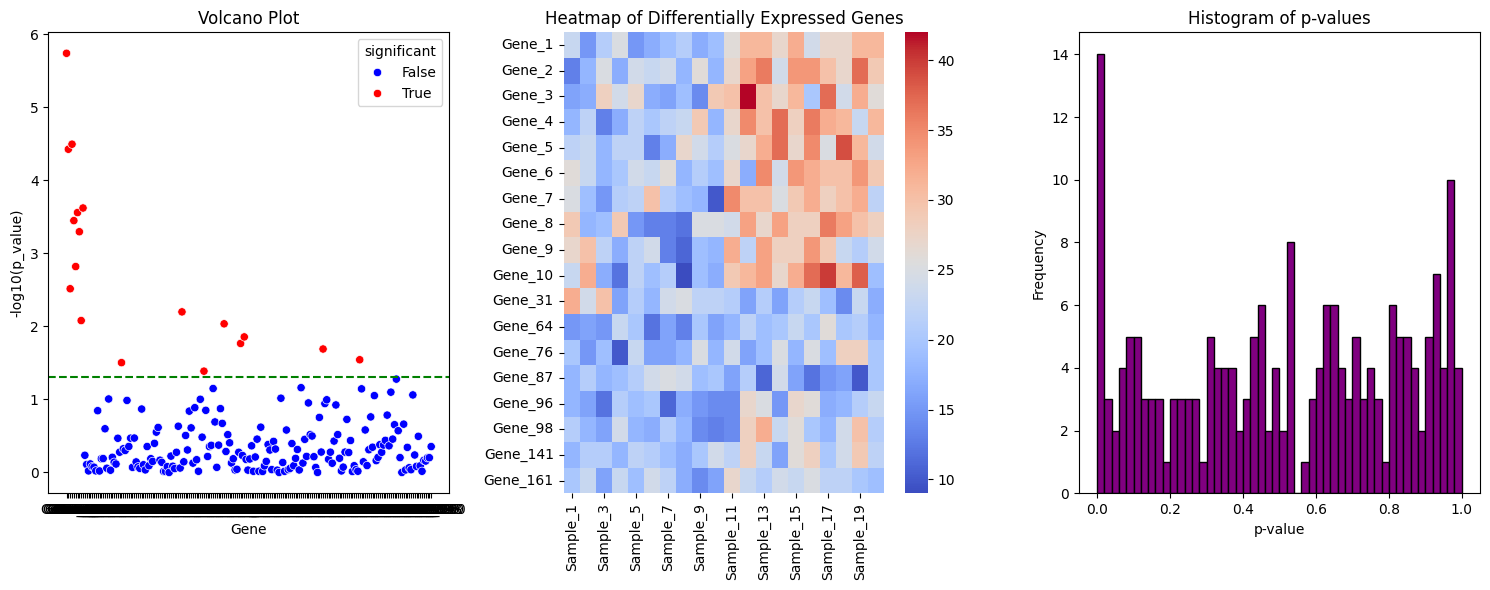

In [7]:
# Generate synthetic RNA-Seq data
np.random.seed(42)
genes = [f'Gene_{i}' for i in range(1, 201)]
samples = [f'Sample_{i}' for i in range(1, 21)]
data = np.random.poisson(lam=20, size=(200, 20))

# Introduce differential expression for a subset of genes
data[0:10, 10:] += 10  # Differentially expressed genes in the last 10 samples

# Create DataFrame
df = pd.DataFrame(data, index=genes, columns=samples)

# Split data into two groups
group1 = df.iloc[:, :10]
group2 = df.iloc[:, 10:]

# Perform t-test
p_values = []
for gene in df.index:
    stat, p_value = ttest_ind(group1.loc[gene], group2.loc[gene])
    p_values.append(p_value)

df['p_value'] = p_values
df['-log10(p_value)'] = -np.log10(df['p_value'])
df['significant'] = df['p_value'] < 0.05

# Plot Volcano Plot
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x=df.index, y='-log10(p_value)', hue='significant', data=df, palette={True: 'red', False: 'blue'})
plt.axhline(y=-np.log10(0.05), color='green', linestyle='--')
plt.title('Volcano Plot')
plt.xlabel('Gene')
plt.ylabel('-log10(p_value)')

# Plot heatmap of differentially expressed genes
plt.subplot(1, 3, 2)
significant_genes = df[df['significant']].index
sns.heatmap(df.loc[significant_genes].iloc[:, :-3], cmap='coolwarm', yticklabels=significant_genes)
plt.title('Heatmap of Differentially Expressed Genes')

# Plot histogram of p-values
plt.subplot(1, 3, 3)
plt.hist(df['p_value'], bins=50, edgecolor='black', color='purple')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.title('Histogram of p-values')

plt.tight_layout()
plt.show()